In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data for each year
df_2018 = pd.read_csv('./Clean_data/clean-startup-2018.csv')
df_2019 = pd.read_csv('./Clean_data/clean-startup-2019.csv')
df_2020 = pd.read_csv('./Clean_data/clean-startup-2020.csv')
df_2021 = pd.read_csv('./Clean_data/clean-startup-2021.csv')

In [3]:
# Concatenate all years into a single dataframe
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

In [4]:
# Print the shape of the dataframe and the first 5 rows
print(df.shape)
print(df.head())
print(df.tail())

(2876, 10)
         Date               Company/Brand     Stage    Amount($)  Year  \
0  2018-01-01  Wide Mobility Mechatronics      Seed    5800000.0  2018   
1  2018-01-01                     Loanzen      Seed    5800000.0  2018   
2  2018-01-02      Aarav Unmanned Systems      Seed    5800000.0  2018   
3  2018-01-02                     Dream11  Series D  100000000.0  2018   
4  2018-01-03           Awign Enterprises      Seed   50000000.0  2018   

   Founded HeadQuarter      Sector Founders Investor  
0     2016   Bangalore  Automotive      NaN      NaN  
1     2016   Bangalore     Finance      NaN      NaN  
2     2016   Bangalore  Technology      NaN      NaN  
3     2016      Mumbai      Gaming      NaN      NaN  
4     2016   Bangalore   Marketing      NaN      NaN  
            Date Company/Brand      Stage    Amount($)  Year  Founded  \
1204  2021-12-30          FRND   Series A    6500000.0  2021     2019   
1205  2021-12-30        Kutuki       Seed    2000000.0  2021     201

In [5]:

# Check for missing values
print(df.isnull().sum())

Date               0
Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded            0
HeadQuarter        0
Sector             0
Founders         526
Investor         526
dtype: int64


In [6]:
# Drop rows with missing values
#df = df.dropna()

In [7]:
# Print the updated shape of the dataframe
#print(df.shape)

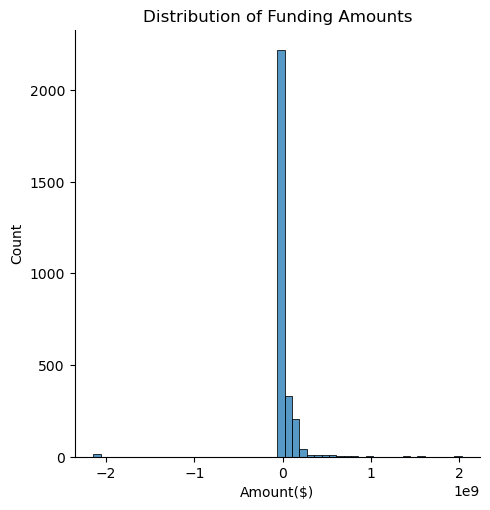

In [8]:
# Plot the distribution of funding amounts
df = df.reset_index(drop=True)
sns.displot(data=df, x='Amount($)', bins=50)
plt.title('Distribution of Funding Amounts')
plt.show()


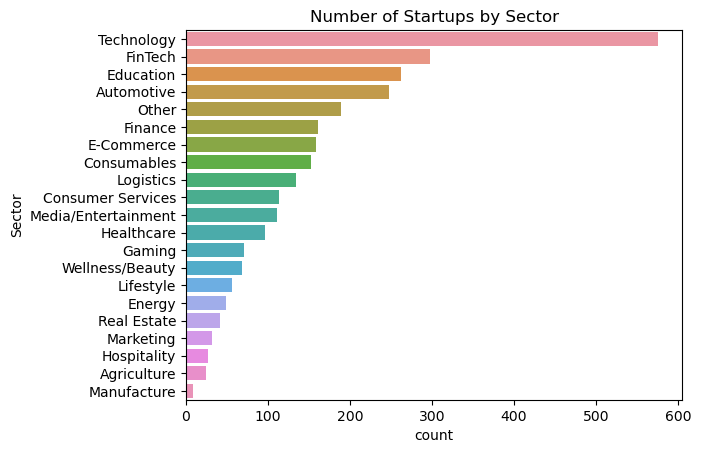

In [9]:
# Get the value counts for each sector and sort them in descending order
sector_counts = df['Sector'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted bars
sns.countplot(data=df, y='Sector', order=sector_counts.index)
plt.title('Number of Startups by Sector')
plt.show()


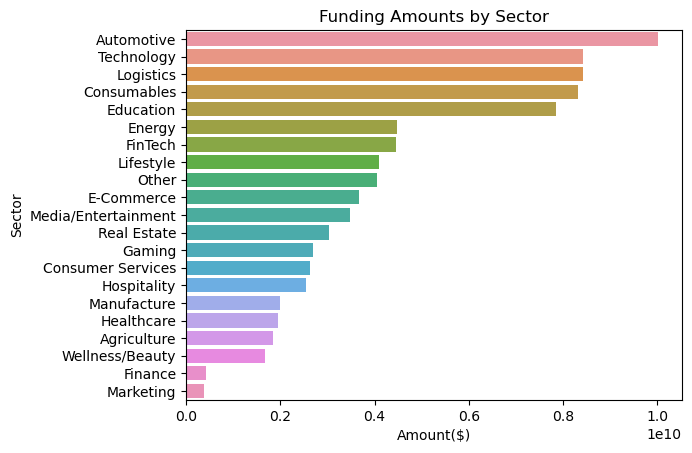

In [10]:
# Sort the sectors by funding amount in descending order
sector_order = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).index

# Plot the funding amounts by sector in descending order
sns.barplot(data=df, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=sector_order)
plt.title('Funding Amounts by Sector')
plt.show()

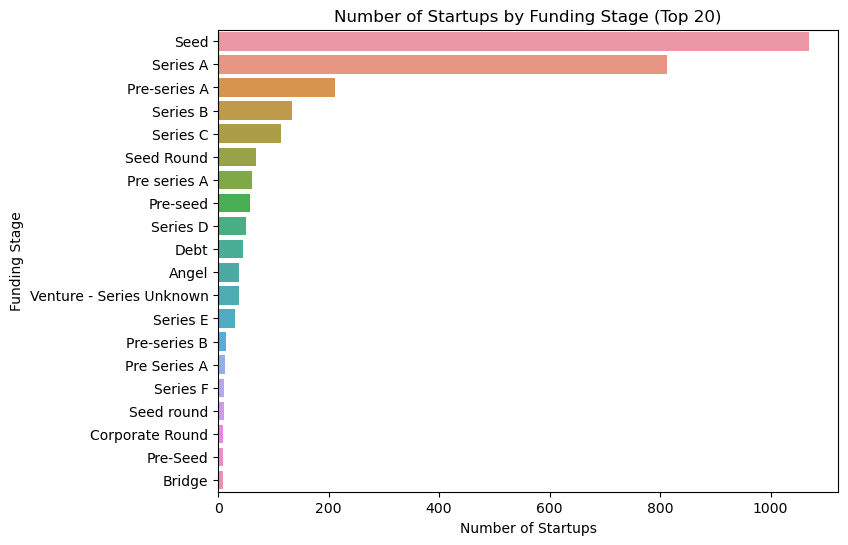

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Stage', order=df['Stage'].value_counts().index[:20])
plt.title('Number of Startups by Funding Stage (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Stage')
plt.show()


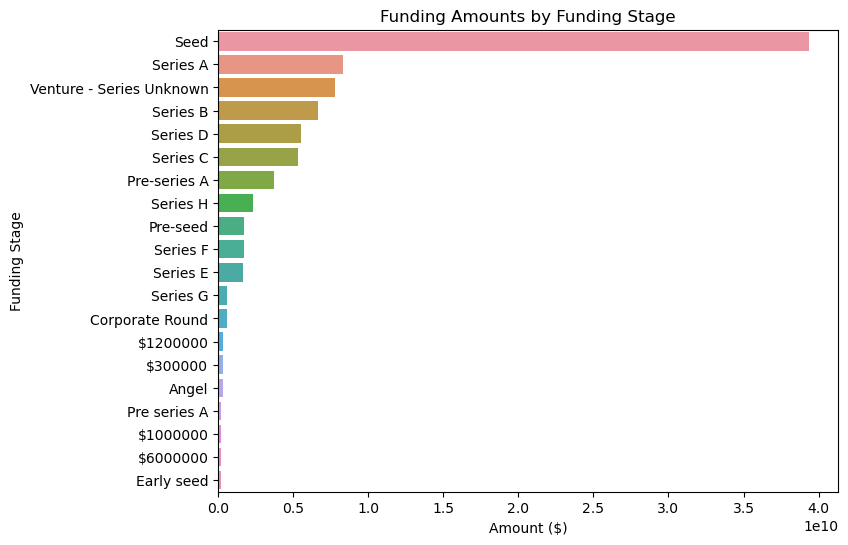

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()



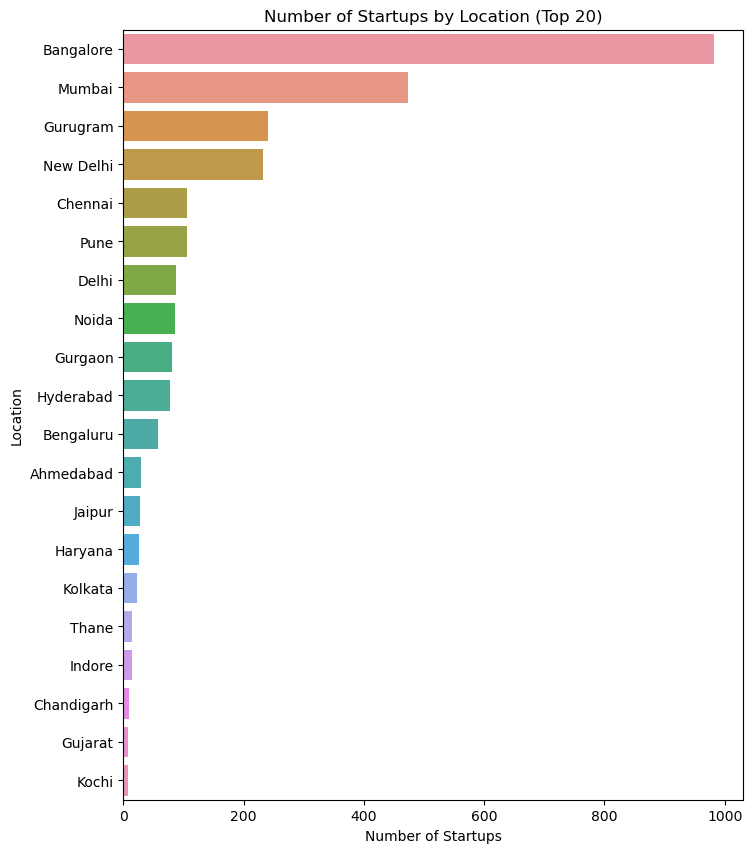

In [23]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, y='HeadQuarter', order=df['HeadQuarter'].value_counts().iloc[:20].index)
plt.title('Number of Startups by Location (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.show()



In [21]:
funding_amount = df['HeadQuarter']
print(funding_amount)


0       Bangalore
1       Bangalore
2       Bangalore
3          Mumbai
4       Bangalore
          ...    
2871    Bangalore
2872    Bangalore
2873     Gurugram
2874       Mumbai
2875    New Delhi
Name: HeadQuarter, Length: 2876, dtype: object


In [22]:
distinct_stages = df['HeadQuarter'].unique()
print(distinct_stages)


['Bangalore' 'Mumbai' 'New Delhi' 'Haryana' 'Delhi' 'Kolkata' 'Cochin'
 'Noida' 'Gurgaon' 'Chennai' 'Jaipur' 'Mohali' 'Bengaluru' 'Hyderabad'
 'Bangalore City' 'Indore' 'Uttar Pradesh' 'Kannur' 'Pune' 'Ahmedabad'
 'Kochi' 'Belgaum' 'Margão' 'Ghaziabad' 'Powai' 'Anand' 'Worli' 'Bhopal'
 'Faridabad' 'Lucknow' 'Kormangala' 'Guntur' 'Coimbatore' 'India'
 'Ernakulam' 'Hubli' 'Kota' 'Guindy' 'Andheri' 'Jodhpur' 'Chandigarh'
 'Alleppey' 'Kalpakkam' 'Kanpur' 'Trivandrum' 'Alwar' 'Azadpur' 'Thane'
 'Kalkaji' 'Mylapore' 'Gurugram' 'Telangana' 'Surat' 'Uttar pradesh'
 'Rajasthan' 'Banglore' 'San Francisco, California, United States'
 'Jaipur, Rajastan' 'Sydney' 'Trivandrum, Kerala, India'
 'Tangerang, Jawa Barat, Indonesia' 'Singapore' 'Bangkok' 'Dehradun'
 'Paris, Ile-de-France, France' 'Gujarat' 'Odisha'
 'San Francisco Bay Area, Silicon Valley, West Coast'
 'Milano, Lombardia, Italy' 'Goa' 'Jiaxing, Zhejiang, China'
 'Frisco, Texas, United States' 'New York, United States' 'California'
 'Franc

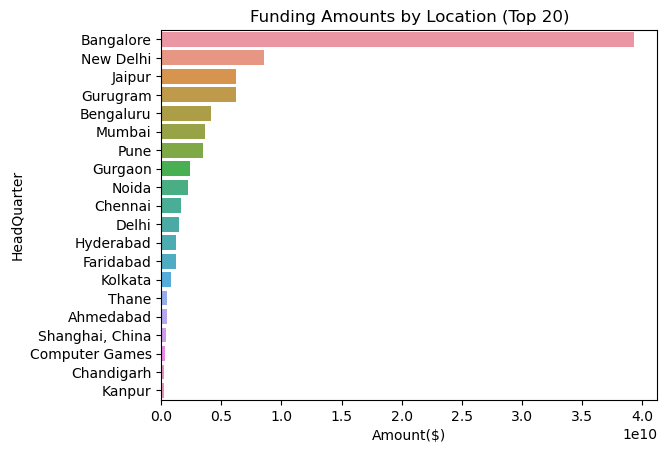

In [27]:
top20_locations = df.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False).head(20).index.tolist()

sns.barplot(data=df, y='HeadQuarter', x='Amount($)', estimator=np.sum, ci=None, order=top20_locations)
plt.title('Funding Amounts by Location (Top 20)')
plt.show()




In [30]:
distinct_stages = df['Stage'].unique()
print(distinct_stages)

['Seed' 'Series D' 'Series A' 'Series B' 'Pre-Seed' 'Grant' 'Series C'
 'Venture - Series Unknown' 'Angel' 'Series H' 'Corporate Round'
 'Series E' 'Post series A' 'Series B+' 'Pre series A' 'Fresh funding'
 'Seed funding' 'Pre-series A' 'Seed round' 'Series G' 'Seed fund'
 'Series F' 'Debt' 'Series A-1' 'Seed Round' 'Pre seed round' 'Pre-series'
 'Bridge' 'Bridge Round' 'Seed Funding' 'Pre series B' 'Pre-Series B'
 'Pre-seed' 'Pre series A1' 'Edge' 'Pre Series A' 'Pre-series B'
 'Pre-series C' 'Pre-seed Round' 'Angel Round' 'Seed Round & Series A'
 'Pre seed Round' 'Pre- series A' 'Series B2' 'Series C, D' 'Mid series'
 'Pre series C' 'Seed Investment' 'Seed A' 'Series E2' 'Series D1'
 '$300000' 'Series A+' 'Series F2' 'Seies A' 'Pre-series A1' 'Series A2'
 'Series F1' '$6000000' 'PE' 'Series I' 'Series B3' 'Seed+' '$1000000'
 '$1200000' 'Early seed']


In [33]:
# Convert to lowercase and remove leading/trailing white spaces
df['Stage'] = df['Stage'].str.lower().str.strip()

# Create a mapping dictionary
mapping_dict = {
    'seed funding': 'Seed',
    'seed fund': 'Seed',
    'seed round': 'Seed',
    'pre-seed': 'Pre-Seed',
    'pre seed round': 'Pre-Seed',
    'pre-seed round': 'Pre-Seed',
    'pre-seed': 'Pre-Seed',
    'pre series a': 'Pre-Series A',
    'pre-series a': 'Pre-Series A',
    'pre series a1': 'Pre-Series A',
    'pre-series a1': 'Pre-Series A',
    'pre series b': 'Pre-Series B',
    'pre-series b': 'Pre-Series B',
    'pre series c': 'Pre-Series C',
    'pre-series c': 'Pre-Series C',
    'pre-a': 'Pre-Series A',
    'angel': 'Angel',
    'angel round': 'Angel',
    'grant': 'Grant',
    'bridge': 'Bridge',
    'bridge round': 'Bridge',
    'venture - series unknown': 'Other',
    'series a': 'Series A',
    'series a+': 'Series A',
    'series a1': 'Series A',
    'series a-1': 'Series A',
    'series a2': 'Series A',
    'series b': 'Series B',
    'series b+': 'Series B',
    'series b2': 'Series B',
    'series b3': 'Series B',
    'series c': 'Series C',
    'series c, d': 'Series C',
    'series d': 'Series D',
    'series d1': 'Series D',
    'series e': 'Series E',
    'series e2': 'Series E',
    'series f': 'Series F',
    'series f1': 'Series F',
    'series f2': 'Series F',
    'series g': 'Series G',
    'series h': 'Series H',
    'series i': 'Series I',
    'post series a': 'Other',
    'mid series': 'Other',
    'fresh funding': 'Other',
    'corporate round': 'Other',
    '$1000000': 'Other',
    '$1200000': 'Other',
    '$300000': 'Other',
    '$6000000': 'Other',
    'debt': 'Other',
    'early seed': 'Pre-Seed',
    'pe': 'Other',
    'seed+': 'Seed',
    'seed a': 'Seed',
    'seed': 'Seed',
}

# Map the values using the dictionary
df['Stage'] = df['Stage'].replace(mapping_dict)

# Replace remaining values with 'Other'
df['Stage'] = df['Stage'].replace(['', '-', 'unknown'], 'Other')


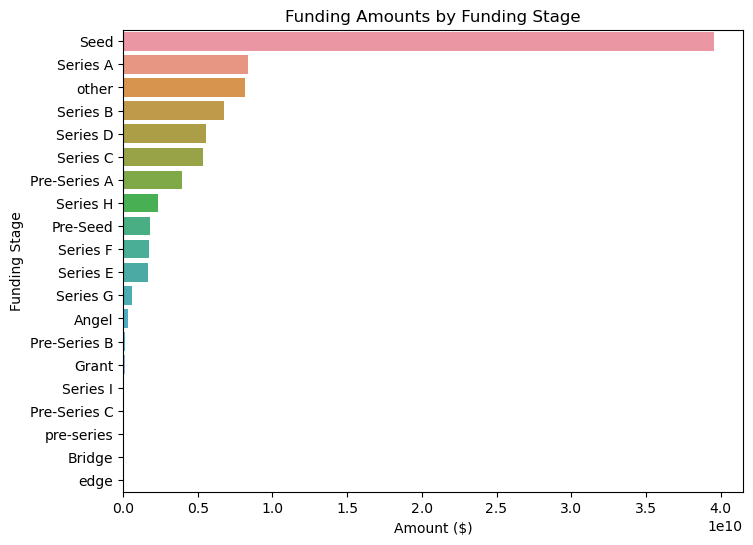

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()

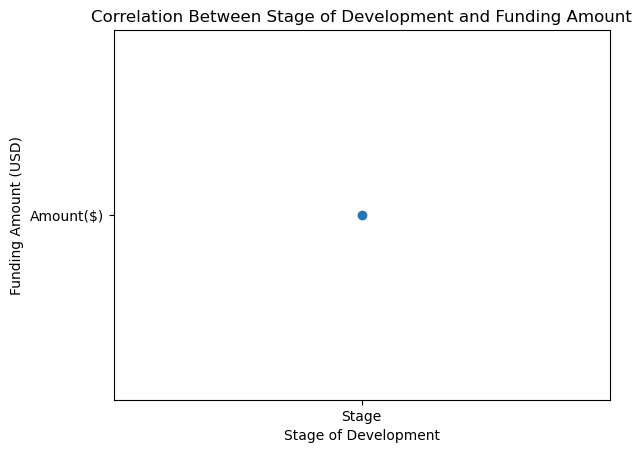

In [39]:
# Create scatter plot
plt.scatter('Stage', 'Amount($)')

# Set axis labels and title
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount (USD)')
plt.title('Correlation Between Stage of Development and Funding Amount')

# Show the plot
plt.show()


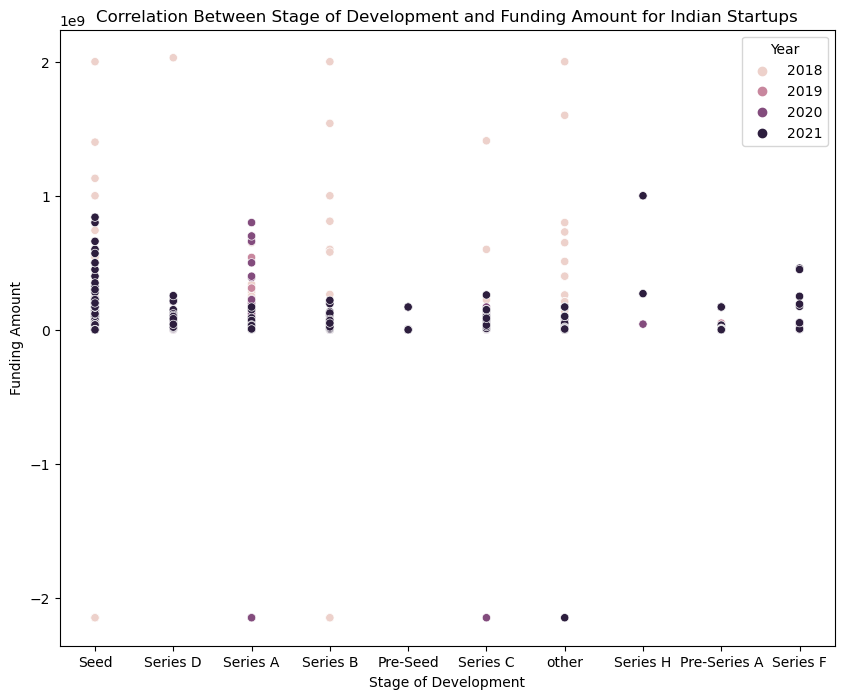

In [56]:
# Filter top 10 stages by funding amount
top10_stages = df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).head(10).index.tolist()
df_filtered = df[df['Stage'].isin(top10_stages)]

# Create scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_filtered, x='Stage', y='Amount($)', hue='Year')
plt.title('Correlation Between Stage of Development and Funding Amount for Indian Startups')
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.show()